In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

In [3]:
from utils.DatasetStorage import Dataset
from utils.paths import *

import os
import itertools

import matplotlib.pyplot as plt

# clasificador
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score
import numpy as np
import pandas as pd

In [4]:
def get_baseline_indomain(dimensions, dataset_name):
    df = None
    
    for dim in dimensions:
        load_scores_path = os.path.join(scores_path,dataset_name, 'baseline', "me1_%d.csv" % (dim))
        df_temp = pd.read_csv(load_scores_path, sep=',', header=0, index_col=0)
        
        if df is None:
            df = df_temp[['Objetivo']]
        
        df['%d Dimensiones' % dim] = df_temp['Baseline error']
        
    return df.drop_duplicates()

# Amazon

In [5]:
dataset_name = datasets[0]

In [6]:
df_amazon = get_baseline_indomain([1000, 3000], dataset_name)
df_amazon

/home/ubuntu/anaconda2/envs/env_memoria/lib/python2.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


,Objetivo,1000 Dimensiones,3000 Dimensiones
0,dvd,16.900423,15.762894
1,kitchen,16.215405,8.587715
2,books,23.710593,15.157879
3,electronics,16.397910,11.127778


In [7]:
save_scores_path = os.path.join(scores_path, dataset_name, "baseline_indomain.csv")
print "Guardando en %s" % save_scores_path
df_amazon.to_csv(save_scores_path, columns=df_amazon.columns)
print "Resultados guardados."

Guardando en scores/amazon/baseline_indomain.csv
Resultados guardados.


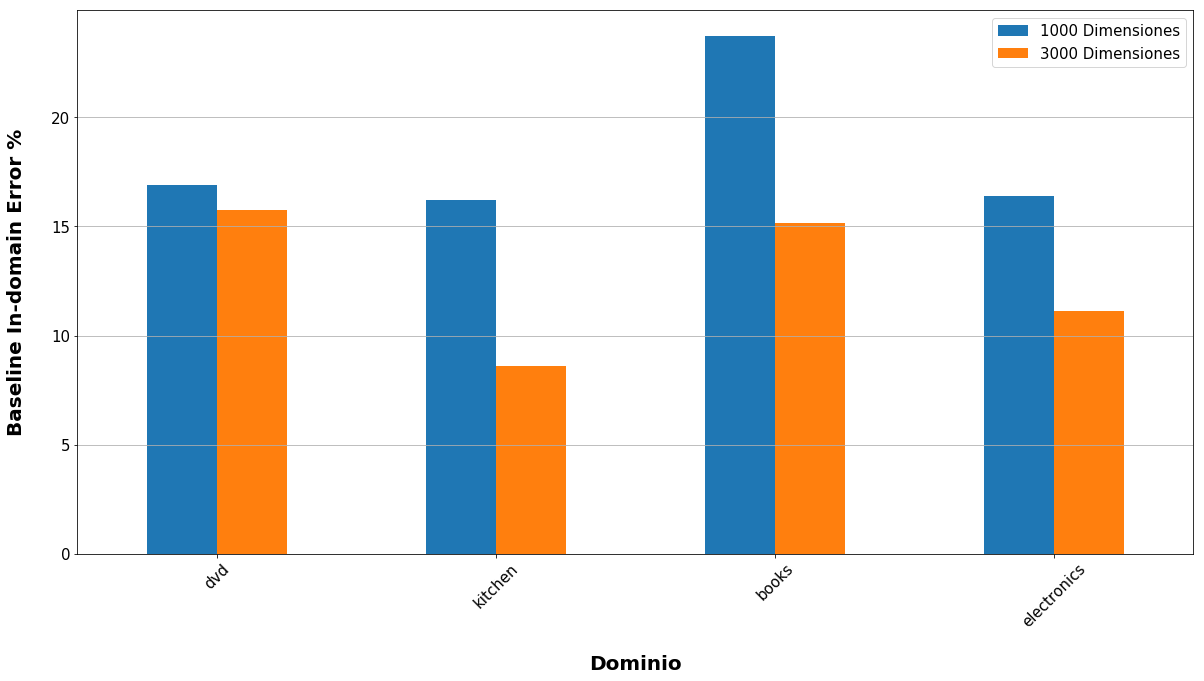

In [8]:
amazon_plot = df_amazon.plot(kind='bar', figsize=(20,10), rot=45, fontsize=15, legend=False)
patches, labels = amazon_plot.get_legend_handles_labels()

amazon_plot.legend(patches, labels, loc='best', fontsize=15)
amazon_plot.yaxis.grid(which='major')
amazon_plot.xaxis.set_ticklabels(df_amazon['Objetivo'])

amazon_plot.set_ylabel("Baseline In-domain Error %", labelpad=25,fontsize=20, weight='bold')
amazon_plot.set_xlabel("Dominio", labelpad=25,fontsize=20, weight='bold')

figure_path = os.path.join(graficos_path, dataset_name, "baseline_indomain.eps")
plt.savefig(figure_path, bbox_inches='tight')

# Twitter

In [9]:
dataset_name = datasets[1]

In [10]:
df_twitter = get_baseline_indomain([1000, 2000], dataset_name)
df_twitter

/home/ubuntu/anaconda2/envs/env_memoria/lib/python2.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


,Objetivo,1000 Dimensiones,2000 Dimensiones
0,thevoice,19.045928,7.362689
1,general,30.407980,26.998127
2,rio2016,7.372958,10.208711


In [11]:
save_scores_path = os.path.join(scores_path, dataset_name, "baseline_indomain.csv")
print "Guardando en %s" % save_scores_path
df_twitter.to_csv(save_scores_path, columns=df_twitter.columns)
print "Resultados guardados."

Guardando en scores/twitter/baseline_indomain.csv
Resultados guardados.


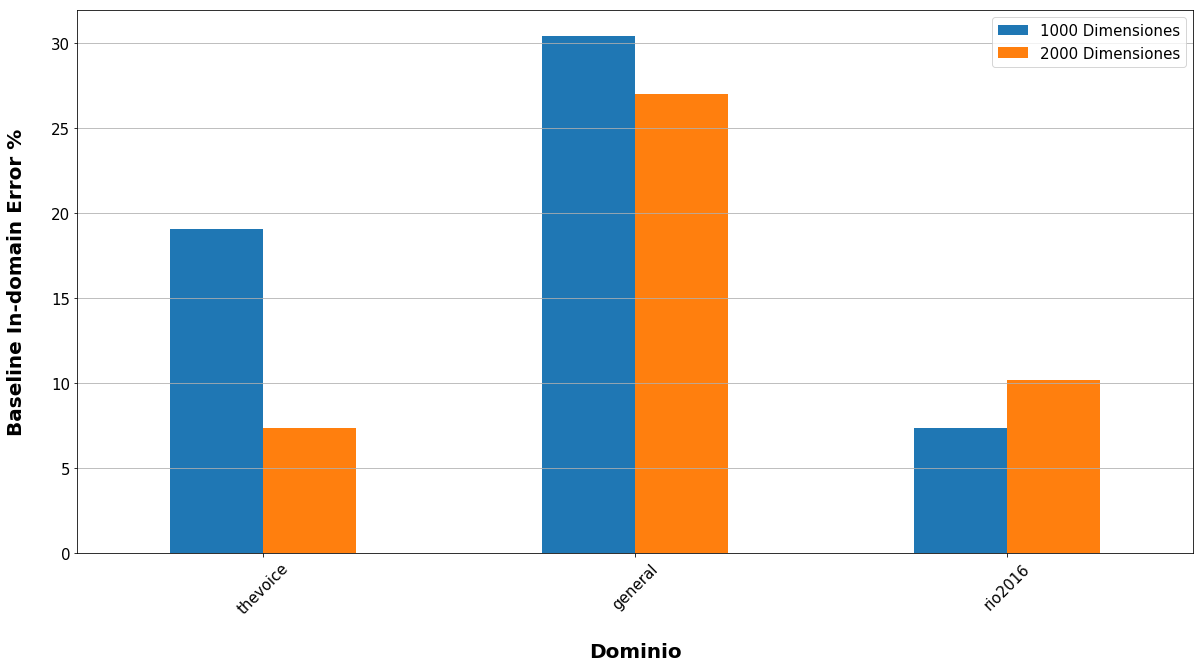

In [12]:
twitter_plot = df_twitter.plot(kind='bar', figsize=(20,10), rot=45, fontsize=15, legend=False)
patches, labels = twitter_plot.get_legend_handles_labels()

twitter_plot.legend(patches, labels, loc='best', fontsize=15)
twitter_plot.yaxis.grid(which='major')
twitter_plot.xaxis.set_ticklabels(df_twitter['Objetivo'])

twitter_plot.set_ylabel("Baseline In-domain Error %", labelpad=25,fontsize=20, weight='bold')
twitter_plot.set_xlabel("Dominio", labelpad=25,fontsize=20, weight='bold')

figure_path = os.path.join(graficos_path, dataset_name, "baseline_indomain.eps")
plt.savefig(figure_path, bbox_inches='tight')